* 참고 : [첫 번째 신경망 훈련하기: 기초적인 분류 문제  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification)

* 텐서플로우로 분류 모델 만들기
* 유방암 데이터를 통해 유방암 여부를 예측합니다.

* 유방암 데이터 요약
```
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

In [21]:
# 해당 데이터의 피처명 입니다.
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 1. 예측할 정답값인 y 값의 빈도수의 비율을 구해주세요.
* 아래와 같은 값이 나오도록 합니다.
```
1    0.627417
0    0.372583
dtype: float64
```

In [22]:
# y 값은 np.array 이기 때문에 pandas의 Series 형태로 변경해서 시각화 합니다.
# 빈도수의 비율을 구하고 막대그래프로 시각화 해주세요.
pd.Series(y).value_counts(normalize=True)

1    0.627417
0    0.372583
dtype: float64

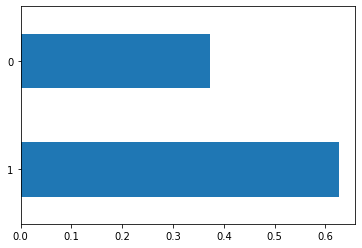

In [23]:
pd.Series(y).value_counts(normalize=True).plot.barh()

## 2. 학습세트와 예측세트 분리하기

In [24]:
# 학습세트와 예측세트를 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

## 3. 입력 갯수로 사용할 input_shape 에 알맞은 값이 들어가도록 변수에 값을 넣어주세요.
* input_shape 변수에 피처의 갯수를 담아 입력의 갯수를 만들어 줍니다.

In [31]:
input_shape = len(data.feature_names)
input_shape

30

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

## 4. 딥러닝 레이어 만들기

다음 빈칸에 입력 갯수와 알맞은 activation 을 입력해 주세요.
* `128개의 덴즈 레이어(드롭아웃 20%)` - `64개의 덴즈레이어(드롭아웃 20%)` 의 레이어로 activation function 은 `relu` 를 사용하도록 구성해 주세요.
* 출력은 `sigmoid` 로 구현해 주세요.

In [32]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(input_shape)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

## 5. 위에서 만든 레이어를 컴파일 해주세요.

* 측정 항목에 `accuracy`가 들어가도록 해주세요.

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 6. 모델 요약값이 나오도록 빈칸에 알맞은 값을 입력해 주세요.

* 아래와 같은 형태가 출력되도록 합니다.

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
=================================================================
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
```

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


## 7. 학습
* 아래의 코드 빈칸을 채워 위에서 만든 레이어로 모델이 학습을 할 수 있도록 완성해 주세요.

In [35]:
history = model.fit(X_train, y_train, 
                    epochs=100, validation_split = 0.2,
                    use_multiprocessing=True,verbose=0)

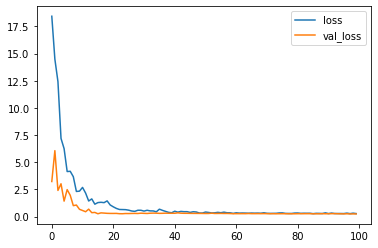

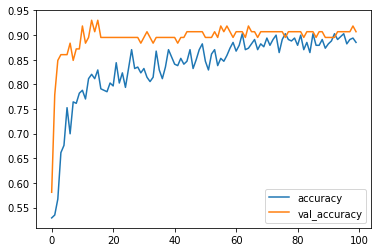

In [36]:
hist = pd.DataFrame(history.history)
hist[["loss", "val_loss"]].plot()
hist[["accuracy", "val_accuracy"]].plot()

## 8. 예측
* 빈칸을 완성해 학습한 모델을 바탕으로 예측할 수 있도록 해주세요.

In [37]:
y_pred = model.predict(X_test)
y_pred[0]

array([0.47802937], dtype=float32)

## 9. 평가
* 빈칸을 완성해 모델의 성능을 측정해 주세요.

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

5/5 - 0s - loss: 0.1616 - accuracy: 0.9441

테스트 정확도: 0.9440559148788452


## 10. Accuracy 값을 직접 구해주세요.
* 실제값(y_test)과 예측값(y_predict)의 차이의 평균을 구해서 accuracy 값을 계산해 주세요.
* 위에서 구한 accuracy 값이 나오도록 직접 파이썬 코드로 구현해 주세요.
* 소숫점 끝자리는 약간의 오차가 있을 수 있습니다.

In [39]:
y_predict = (y_pred > 0.5).astype("int32").flatten()
y_predict[:5]

array([0, 0, 0, 1, 1], dtype=int32)

In [40]:
(y_test == y_predict).mean()

0.9440559440559441